<a href="https://colab.research.google.com/github/MrRezamo/All_links_from_given_webpage/blob/main/Rejected_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

**Rejected Loans Dataset (rejected_2007_to_2018Q4.csv.gz):**

Complementing the accepted loans data, this dataset encompasses loan applications that were not approved from 2007 to the fourth quarter of 2018. It illuminates the common reasons behind loan rejections, thereby offering an understanding of the lending criteria and decision-making processes within the financial industry. Key data points in this dataset include the requested loan amount, applicants' credit scores, employment details, and other pertinent financial information. This dataset is a valuable asset for comprehending the dynamics of loan rejections and the various factors that influence lending decisions. It provides an essential counterpoint to the accepted loans data, offering a more complete view of the lending process.

#Importing Essential Python Libraries

The beginning of a data analysis or data visualization project often involves importing various Python libraries. Here, we're importing some of the most commonly used libraries in data science

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

print("OK")

OK


# Mounting Google Drive in Google Colab
Google Colab allows you to write and execute Python in your browser, with zero configuration, free access to GPUs, and easy sharing options. It's an excellent tool for data analysis and machine learning tasks.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading CSV Datasets in Google Colab Notebooks

Here I define accepted file directory

In [3]:
DIR = '/content/drive/MyDrive/Colab Notebooks/Turing_Projects/Sprint3_ML/Source'
REJ_FILE = '/rejected_2007_to_2018Q4.csv.gz'

rej_dir = f'{DIR}{REJ_FILE}'

print(f'File directory : {rej_dir}')

File directory : /content/drive/MyDrive/Colab Notebooks/Turing_Projects/Sprint3_ML/Source/rejected_2007_to_2018Q4.csv.gz


I want to have (10000) sample of data for better data understanding about Rejected file

In [4]:
sample_rejected_df = pd.read_csv(rej_dir,compression='gzip',nrows=10000)

In [5]:
# Read a small sample (1000 rwos) of the data to inspect the types
sample_rejected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount Requested      10000 non-null  float64
 1   Application Date      10000 non-null  object 
 2   Loan Title            10000 non-null  object 
 3   Risk_Score            9657 non-null   float64
 4   Debt-To-Income Ratio  10000 non-null  object 
 5   Zip Code              10000 non-null  object 
 6   State                 10000 non-null  object 
 7   Employment Length     10000 non-null  object 
 8   Policy Code           10000 non-null  float64
dtypes: float64(3), object(6)
memory usage: 703.2+ KB


In [6]:
# Convert 'Application Date' to string and then to datetime

sample_rejected_df['Application Date'] = pd.to_datetime(sample_rejected_df['Application Date'].astype(str))

# Define date range
start_date = '2018-01-01'
end_date = '2018-12-31'

In [7]:
# Initialize an empty DataFrame
sample_rejected = pd.DataFrame()

# Read the file in chunks
chunksize = 10 ** 6
for chunk in pd.read_csv(rej_dir, chunksize=chunksize, parse_dates=['Application Date']):
    # Filter by date range
    filtered_chunk = chunk[(chunk['Application Date'] >= start_date) & (chunk['Application Date'] <= end_date)]
    sample_rejected = pd.concat([sample_rejected, filtered_chunk])

In [8]:
sample_rejected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9496782 entries, 4404427 to 19699075
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Amount Requested      float64       
 1   Application Date      datetime64[ns]
 2   Loan Title            object        
 3   Risk_Score            float64       
 4   Debt-To-Income Ratio  object        
 5   Zip Code              object        
 6   State                 object        
 7   Employment Length     object        
 8   Policy Code           float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 724.5+ MB


In [9]:
for col in sample_rejected.columns:
    if sample_rejected[col].dtype == 'float64':
        sample_rejected[col] = sample_rejected[col].astype('float16')

In [10]:
# Convert object columns to category if they have relatively few unique values
for col in sample_rejected.select_dtypes(include=['object']).columns:
    if sample_rejected[col].nunique() / len(sample_rejected) < 0.1:
        sample_rejected[col] = sample_rejected[col].astype('category')

In [11]:
# Verify the memory usage
print(sample_rejected.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9496782 entries, 4404427 to 19699075
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Amount Requested      float16       
 1   Application Date      datetime64[ns]
 2   Loan Title            category      
 3   Risk_Score            float16       
 4   Debt-To-Income Ratio  category      
 5   Zip Code              category      
 6   State                 category      
 7   Employment Length     category      
 8   Policy Code           float16       
dtypes: category(5), datetime64[ns](1), float16(3)
memory usage: 288.1 MB
None


In [12]:
sample_rejected.head(5)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
4404427,3000.0,2018-07-01,Debt consolidation,NaN,100%,925xx,CA,< 1 year,0.0
4404428,40000.0,2018-07-01,Major purchase,NaN,7.45%,335xx,FL,< 1 year,0.0
4404429,16000.0,2018-07-01,Debt consolidation,NaN,34.93%,156xx,PA,< 1 year,0.0
4404430,40000.0,2018-07-01,Debt consolidation,NaN,27.87%,957xx,CA,< 1 year,0.0
4404431,inf,2018-07-01,Business Loan,NaN,-1%,258xx,TN,< 1 year,0.0


## columns atterbiute

ℹ **Understanding the Rejected Columns Dataset** :

**Amount Requested**: This is the total amount of money that the borrower requested in the loan application.

**Application Date**: This is the date on which the loan application was submitted.

**Loan Title**: The purpose of the loan as stated by the borrower

**Risk_Score**: This is likely a credit score or a similar metric used to assess the borrower’s creditworthiness

**Debt-To-Income Ratio**: This ratio is a personal finance measure that compares an individual’s monthly debt payment to their monthly gross income.

**Zip Code**: The postal code of the borrower’s residence.

**State**: The state provided by the borrower in the loan application

**Employment Length**: The duration of the borrower’s current employment.

**Policy Code**: This typically refers to the internal policy under which the loan is issued.

Policy code has 3 possible values :

* 0 - the loan is not meeting lending club requirements and is rejected, lenders cannot invest in this loan

* 1 - the loan meets the lending club requirements and is approved, lenders can invest in this loan

* 2 - a new type of loan which doesn't quite meet the criteria of Lending Club but these loans can be approved with the condition that only specific investors (accredited fund management companies) can fund these loans

# Data Overview

## Data Cleaning

Here I want to manage my columns name

In [13]:
sample_rejected.columns = sample_rejected.columns.map(lambda x: x.replace(' ', '_'))
sample_rejected.columns = sample_rejected.columns.map(lambda x: x.replace('-', '_'))

In [14]:
sample_rejected.columns

Index(['Amount_Requested', 'Application_Date', 'Loan_Title', 'Risk_Score',
       'Debt_To_Income_Ratio', 'Zip_Code', 'State', 'Employment_Length',
       'Policy_Code'],
      dtype='object')

Here I want to split my rejected data to two part , numerical and categorical columns

In [15]:
numerical_columns = []
category_columns = []

for i in sample_rejected.columns:
  if sample_rejected[i].dtype == 'float16':
    numerical_columns.append(i)
  if sample_rejected[i].dtype == 'category':
    category_columns.append(i)

print(f'float columns: {numerical_columns}')
print('__'*70)
print(f'category columns: {category_columns}')

float columns: ['Amount_Requested', 'Risk_Score', 'Policy_Code']
____________________________________________________________________________________________________________________________________________
category columns: ['Loan_Title', 'Debt_To_Income_Ratio', 'Zip_Code', 'State', 'Employment_Length']


### Missing_values

In [16]:
sample_rejected[numerical_columns].isnull().sum()

Amount_Requested          0
Risk_Score          8848602
Policy_Code               0
dtype: int64

Risk Score has 8848602 null values ???

In [17]:
sample_rejected[category_columns].isnull().sum()

Loan_Title                   0
Debt_To_Income_Ratio         0
Zip_Code                     0
State                        0
Employment_Length       291961
dtype: int64

In [18]:
((sample_rejected.isnull().sum()/len(sample_rejected))*100).sort_values(ascending=False)

Risk_Score              93.174741
Employment_Length        3.074315
Amount_Requested         0.000000
Application_Date         0.000000
Loan_Title               0.000000
Debt_To_Income_Ratio     0.000000
Zip_Code                 0.000000
State                    0.000000
Policy_Code              0.000000
dtype: float64

more than 93% , I have to deal with this huge missing values

In [19]:
# Identify missing values across the DataFrame
nan_values = sample_rejected.isna()

# Count the number of missing values in each column
nan_counts = nan_values.sum()

# Identify infinite values across the DataFrame
inf_values = np.isinf(sample_rejected.select_dtypes(include=[np.number]))  # only select numeric columns

# Count the number of infinite values in each column
inf_counts = inf_values.sum()

# Print the counts of missing and infinite values for each column
print("Missing values count per column:\n", nan_counts)
print("\nInfinite values count per column:\n", inf_counts)

Missing values count per column:
 Amount_Requested              0
Application_Date              0
Loan_Title                    0
Risk_Score              8848602
Debt_To_Income_Ratio          0
Zip_Code                      0
State                         0
Employment_Length        291961
Policy_Code                   0
dtype: int64

Infinite values count per column:
 Amount_Requested    23771
Risk_Score              0
Policy_Code             0
dtype: int64


**what is the risk score in lending club?**

The risk score in Lending Club typically refers to the assessment of a borrower's creditworthiness and the associated risk of lending to them. Here's what you need to know about it:


Credit Score: Lending Club, like many other lenders, uses credit scores to assess risk. The FICO credit score is commonly used, ranging from ***300 to 850***.

**A higher score indicates lower credit risk, while a lower score suggests higher risk.**

In summary, the risk score in Lending Club is a measure of creditworthiness and the associated risk of lending to a borrower. It is typically based on credit scores and other factors to make informed lending decisions.

In [20]:
sample_rejected['Risk_Score'].describe()

count    648180.0
mean          NaN
std           NaN
min         300.0
25%         588.0
50%         629.0
75%         667.0
max         990.0
Name: Risk_Score, dtype: float64

count: There are 648,180 observations in the dataset.

mean: The average (mean) of the data is not available (NaN).

std: The standard deviation of the data is not available (NaN), which is a measure of the amount of variation or dispersion of a set of values.

min: The minimum score in the dataset is 300.

25% (first quartile): 25% of the scores are below 588.

50% (median): 50% of the scores are below 629, which is the median score of the dataset.

75% (third quartile): 75% of the scores are below 677.

max: The maximum score in the dataset is 990.

<Axes: xlabel='Risk_Score', ylabel='Count'>

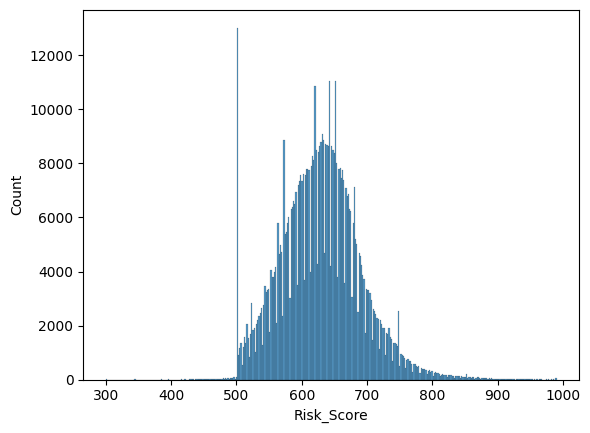

In [21]:
# Plotting the distribution of Risk_Score
sns.histplot(sample_rejected['Risk_Score'])

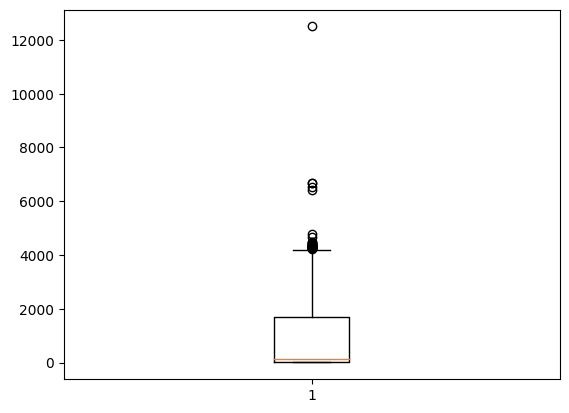

In [22]:
plt.boxplot(sample_rejected['Risk_Score'].value_counts())
plt.show()

In [23]:
# Calculate the Pearson correlation coefficient
correlation_matrix = sample_rejected[['Risk_Score', 'Amount_Requested']].corr()

correlation_matrix

,Risk_Score,Amount_Requested
Risk_Score,1.000000,0.280456
Amount_Requested,0.280456,1.000000


 the resources for advanced statistical methods or consultation with a statistician are not available , so I decided to remove the missing values from the 'Risk_Score' column

In [24]:
# Remove rows where 'Risk_Score' is missing
sample_rejected = sample_rejected.dropna(subset=['Risk_Score'])

In [25]:
((sample_rejected.isnull().sum()/len(sample_rejected))*100).sort_values(ascending=False)

Employment_Length       3.060261
Amount_Requested        0.000000
Application_Date        0.000000
Loan_Title              0.000000
Risk_Score              0.000000
Debt_To_Income_Ratio    0.000000
Zip_Code                0.000000
State                   0.000000
Policy_Code             0.000000
dtype: float64

### Amount_Requested

In [26]:
sample_rejected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648180 entries, 4404458 to 19699073
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Amount_Requested      648180 non-null  float16       
 1   Application_Date      648180 non-null  datetime64[ns]
 2   Loan_Title            648180 non-null  category      
 3   Risk_Score            648180 non-null  float16       
 4   Debt_To_Income_Ratio  648180 non-null  category      
 5   Zip_Code              648180 non-null  category      
 6   State                 648180 non-null  category      
 7   Employment_Length     628344 non-null  category      
 8   Policy_Code           648180 non-null  float16       
dtypes: category(5), datetime64[ns](1), float16(3)
memory usage: 21.9 MB


I find there are numbers after the decimal point

In [27]:
# Replace 'inf' and '-inf' with NaN
sample_rejected['Amount_Requested'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert the column to float64 to handle NaN values
sample_rejected['Amount_Requested'] = sample_rejected['Amount_Requested'].astype('float16')

In [28]:
# drop the rows with NaN values:
sample_rejected = sample_rejected.dropna(subset=['Amount_Requested'])

# Convert the column to integer by first removing the decimal part
sample_rejected['Amount_Requested'] = sample_rejected['Amount_Requested'].apply(lambda x: int(x))

Based on the informantion about Lending Club only less than 40000$ is accepted and more than that is impossible

In [29]:
# Filter only less than 40000 values in Amount_Requested column

sample_rejected = sample_rejected[sample_rejected['Amount_Requested'] <= 40000]

In [30]:
sample_rejected['Amount_Requested'].describe()

count    648045.000000
mean      11281.136795
std       10606.477091
min         525.000000
25%        3000.000000
50%        8000.000000
75%       15000.000000
max       40000.000000
Name: Amount_Requested, dtype: float64

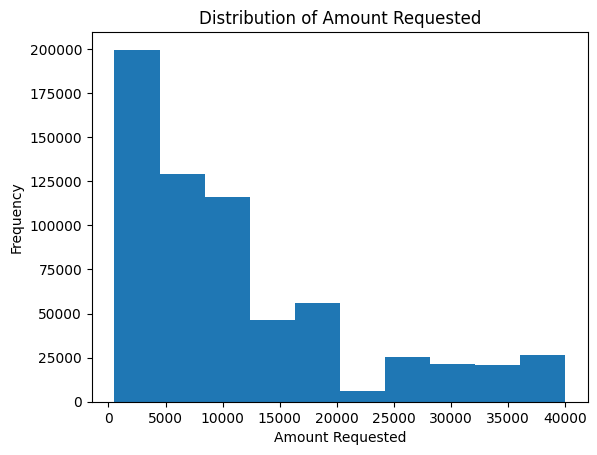

In [ ]:
# Ploting Amount_Requested distribution

plt.hist(sample_rejected['Amount_Requested'],bins=10 )
plt.xlabel('Amount Requested')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Requested')
plt.show()

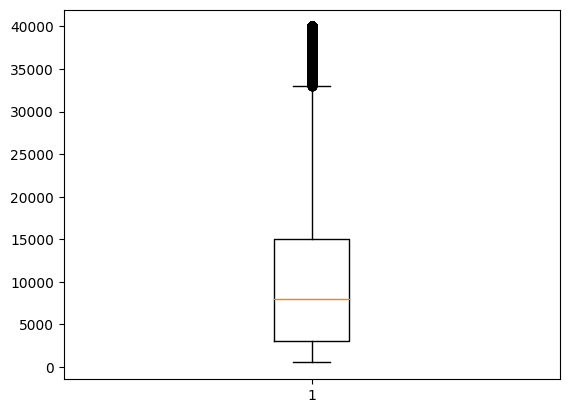

In [ ]:
plt.boxplot(sample_rejected['Amount_Requested'])
plt.show()

### Debt_To_Income_Ratio

**Debt-To-Income Ratio**: This ratio is a personal finance measure that compares an individual’s monthly debt payment to their monthly gross income.

Debt-To-Income Ratio = Fico-Mean

In [31]:
sample_rejected['Debt_To_Income_Ratio'] = sample_rejected['Debt_To_Income_Ratio'].str.rstrip('%').astype('float64') / 100.0

I need to convert a column to a numerical format for using a model.

In [32]:
sample_rejected['Debt_To_Income_Ratio'].describe()

count    648045.000000
mean          0.899128
std          16.816894
min           0.000000
25%           0.022500
50%           0.164000
75%           0.344600
max        7304.265000
Name: Debt_To_Income_Ratio, dtype: float64

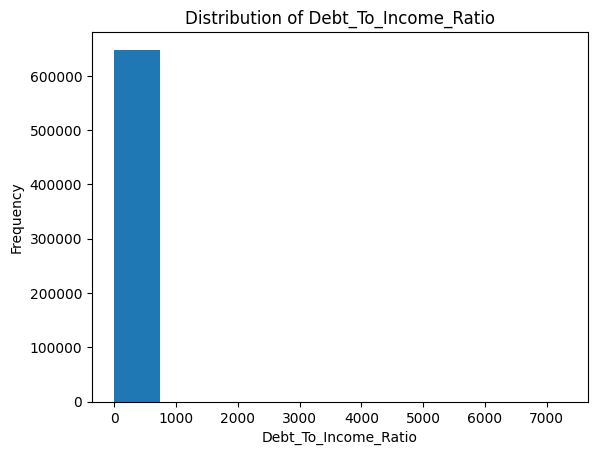

In [ ]:
plt.hist(sample_rejected['Debt_To_Income_Ratio'],bins=10)
plt.xlabel('Debt_To_Income_Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt_To_Income_Ratio')
plt.show()

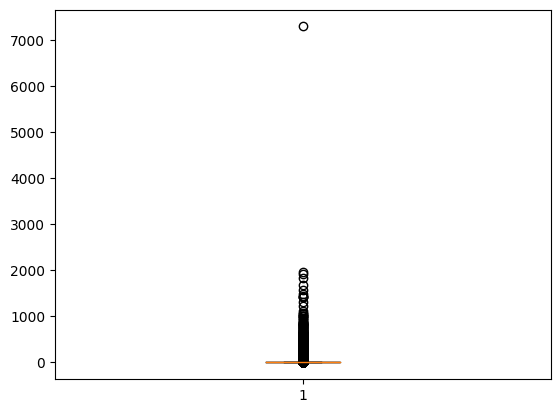

In [ ]:
plt.boxplot(sample_rejected['Debt_To_Income_Ratio'])
plt.show()

in this part I convert type of Debt_To_Income_Ratio from category to float

**The normal or ideal Debt-to-Income (DTI) ratio** in lending can vary slightly depending on the source, but there is a general consensus among lenders and financial institutions. Here's a summary of the information from the provided sources:

Investopedia suggests that ideally, lenders prefer a DTI ratio lower than 36% when considering you for a mortgage or rental payment

Bankrate states that most lenders view DTI ratios of 36% or less as ideal, and it's challenging to get a loan with a DTI ratio exceeding 50%

LendingTree mentions that DTI ratio requirements typically range between 41% and 50% depending on the loan program you apply for, with stricter guidelines for some loans

Credit.org suggests that an acceptable debt-to-income ratio should sit at or below 36%, with mortgage lenders often requiring a DTI ratio of 36% or less

Wells Fargo states that a DTI ratio of 35% or less is considered good, as it indicates that your debt is manageable relative to your income

Investopedia reiterates that a good DTI ratio is below 43%, with many lenders preferring 36% or below

In summary, while there is some variation, a DTI ratio below 36% to 43% is generally considered normal or ideal in lending.


---



### Application_Date

Here I convert the 'Application_Data' column to data time

In [33]:
sample_rejected['Application_Date'].dtype

dtype('<M8[ns]')

In [ ]:
sample_rejected['Application_Date'].unique()

array(['2018-07-01T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-07-03T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
       '2018-07-05T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-07-07T00:00:00.000000000', '2018-07-08T00:00:00.000000000',
       '2018-07-09T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-07-12T00:00:00.000000000',
       '2018-07-13T00:00:00.000000000', '2018-07-14T00:00:00.000000000',
       '2018-07-15T00:00:00.000000000', '2018-07-16T00:00:00.000000000',
       '2018-07-17T00:00:00.000000000', '2018-07-18T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-07-20T00:00:00.000000000',
       '2018-07-21T00:00:00.000000000', '2018-07-22T00:00:00.000000000',
       '2018-07-23T00:00:00.000000000', '2018-07-24T00:00:00.000000000',
       '2018-07-25T00:00:00.000000000', '2018-07-26T00:00:00.000000000',
       '2018-07-27T00:00:00.000000000', '2018-07-28

Application_Date start from 2016-01-01 to 2018-12-31


---



### Loan_Title

In [34]:
sample_rejected['Loan_Title'].unique()

['Other', 'Home buying', 'Medical expenses', 'Debt consolidation', 'Car financing', ..., 'Credit card refinancing', 'Moving and relocation', 'Vacation', 'Green loan', 'Learning and training']
Length: 13
Categories (16, object): ['Business', 'Business Loan', 'Car financing',
                          'Credit card refinancing', ..., 'Other', 'Vacation', 'home_improvement', 'other']

In [35]:
sample_rejected['Loan_Title'].value_counts().sort_values(ascending=False).head(10)

Debt consolidation         248917
Other                      166338
Credit card refinancing     82987
Car financing               40887
Home buying                 22087
Medical expenses            20562
Moving and relocation       19102
Major purchase              17231
Home improvement            14340
Business                     9342
Name: Loan_Title, dtype: int64

I figur out here I have the same values but they have different writing .

In [36]:
# Convert to lowercase
sample_rejected['Loan_Title'] = sample_rejected['Loan_Title'].str.lower()

# Replace spaces with underscores
sample_rejected['Loan_Title'] = sample_rejected['Loan_Title'].str.replace(' ', '_')

In [37]:
sample_rejected['Loan_Title'].value_counts().sort_values(ascending=False).head(10)

debt_consolidation         248917
other                      166338
credit_card_refinancing     82987
car_financing               40887
home_buying                 22087
medical_expenses            20562
moving_and_relocation       19102
major_purchase              17231
home_improvement            14340
business                     9342
Name: Loan_Title, dtype: int64

### Employment_Length

In [38]:
sample_rejected['Employment_Length'].value_counts().sort_values(ascending=False).head(10)

< 1 year     588888
1 year         8034
5 years        7129
10+ years      7085
3 years        4912
2 years        4247
4 years        3003
8 years        1919
6 years        1142
9 years         938
Name: Employment_Length, dtype: int64

In [39]:
# Here I want to convert the 'Employment_Length' column to numeric values.
sample_rejected['Employment_Length'] = sample_rejected['Employment_Length'].str.replace(' years', '')
sample_rejected['Employment_Length'] = sample_rejected['Employment_Length'].str.replace(' year', '')
sample_rejected['Employment_Length'] = sample_rejected['Employment_Length'].str.replace('< 1', '0')
sample_rejected['Employment_Length'] = sample_rejected['Employment_Length'].str.replace('+', '')

In [40]:
sample_rejected['Employment_Length'] = pd.to_numeric(sample_rejected['Employment_Length'], errors='coerce')

In [41]:
sample_rejected['Employment_Length'].value_counts().sort_values(ascending=False).head(10)

0.0     588888
1.0       8034
5.0       7129
10.0      7085
3.0       4912
2.0       4247
4.0       3003
8.0       1919
6.0       1142
9.0        938
Name: Employment_Length, dtype: int64

### Policy_Code

In [42]:
print(sample_rejected['Policy_Code'].unique())
print('_'*20)
print(sample_rejected['Policy_Code'].value_counts())

[0. 2.]
____________________
0.0    647425
2.0       620
Name: Policy_Code, dtype: int64


Policy code has 3 possible values :

0 - the loan is not meeting lending club requirements and is rejected, lenders cannot invest in this loan

1 - the loan meets the lending club requirements and is approved, lenders can invest in this loan

2 - a new type of loan which doesn't quite meet the criteria of Lending Club but these loans can be approved with the condition that only specific investors (accredited fund management companies) can fund these loans

In [43]:
# based on the above note, it seems like `sample_rejected` I should remove (2) values
sample_rejected = sample_rejected[sample_rejected['Policy_Code'] != 2]

In [44]:
print(sample_rejected['Policy_Code'].unique())
print('_'*20)
print(sample_rejected['Policy_Code'].value_counts())

[0.]
____________________
0.0    647425
Name: Policy_Code, dtype: int64


### State and Zip_code

In [45]:
sample_rejected['State'].value_counts().sort_values(ascending=False).head(10)

CA    74324
TX    58190
FL    51001
NY    42676
GA    26839
PA    24134
OH    23753
IL    22118
NC    20971
NJ    18482
Name: State, dtype: int64

In [46]:
sample_rejected['State'].unique()

['TX', 'NC', 'AZ', 'MN', 'PA', ..., 'DC', 'MT', 'SD', 'DE', 'IA']
Length: 51
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [47]:
sample_rejected['Zip_Code'].unique()

['767xx', '287xx', '853xx', '750xx', '554xx', ..., '343xx', '504xx', '507xx', '340xx', '205xx']
Length: 922
Categories (999, object): ['000xx', '001xx', '002xx', '003xx', ..., '996xx', '997xx', '998xx', '999xx']

# Data Selection

In [48]:
# Create a copy from DataFrame
df = sample_rejected.copy()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647425 entries, 4404458 to 19699073
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Amount_Requested      647425 non-null  int64         
 1   Application_Date      647425 non-null  datetime64[ns]
 2   Loan_Title            647425 non-null  object        
 3   Risk_Score            647425 non-null  float16       
 4   Debt_To_Income_Ratio  647425 non-null  float64       
 5   Zip_Code              647425 non-null  category      
 6   State                 647425 non-null  category      
 7   Employment_Length     627636 non-null  float64       
 8   Policy_Code           647425 non-null  float16       
dtypes: category(2), datetime64[ns](1), float16(2), float64(2), int64(1), object(1)
memory usage: 34.0+ MB


In [50]:
df_float_columns = []
df_category_columns = []

for i in df.columns:
  if df[i].dtype in ['int','float']:
    df_float_columns.append(i)
  if df[i].dtype in ['object','category']:
    df_category_columns.append(i)

print(f'float columns: {df_float_columns}')
print('__'*70)
print(f'category columns: {df_category_columns}')

float columns: ['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length']
____________________________________________________________________________________________________________________________________________
category columns: ['Loan_Title', 'Zip_Code', 'State']


In [51]:
final_columns = [
    'Amount_Requested','Risk_Score','Debt_To_Income_Ratio','Employment_Length','Loan_Title'
]

In [52]:
df = df[final_columns]

In [53]:
df.head()

,Amount_Requested,Risk_Score,Debt_To_Income_Ratio,Employment_Length,Loan_Title
4404458,1000,616.0,0.0136,0.0,other
4404477,5000,607.0,0.0143,0.0,other
4404496,10000,594.0,0.0000,0.0,home_buying
4404500,24992,631.0,0.1154,0.0,other
4404519,9000,544.0,0.0000,NaN,medical_expenses


# General Information About Dataset

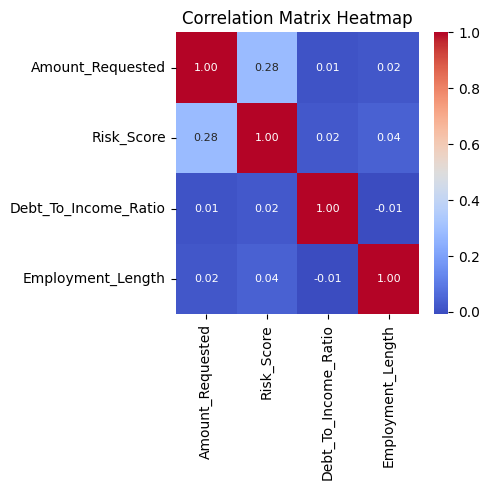

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

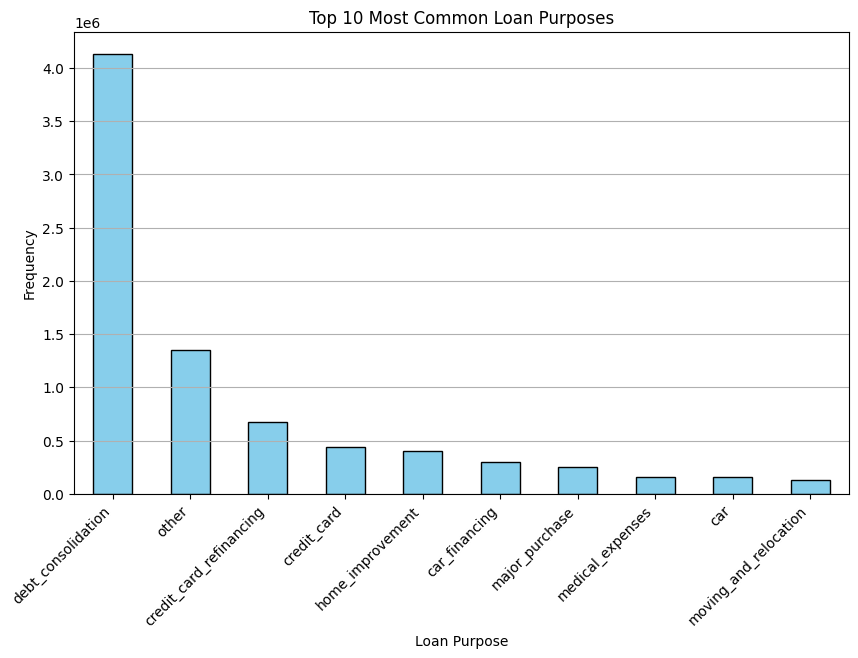

In [ ]:
# Plotting the most common loan purposes
plt.figure(figsize=(10, 6))
sample_rejected['Loan_Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Common Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

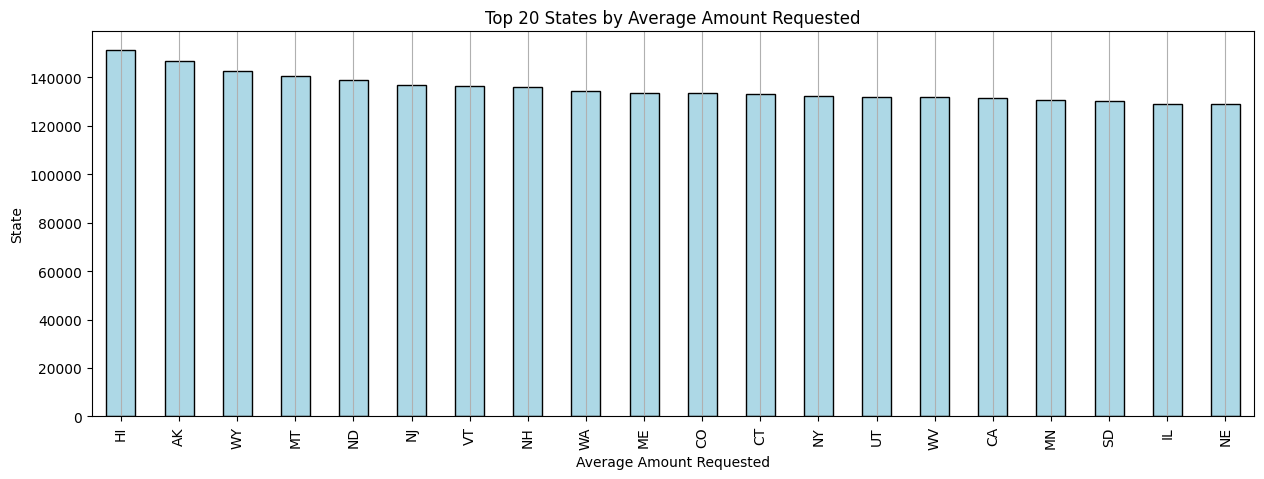

In [ ]:
# Plotting the relation between state and average amount requested
plt.figure(figsize=(15, 5))
(sample_rejected.groupby('State')['Amount_Requested']
 .mean()
 .sort_values(ascending=False)
 .head(20)
 .plot(kind='bar', color='lightblue', edgecolor='black'))
plt.title('Top 20 States by Average Amount Requested')
plt.xlabel('Average Amount Requested')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

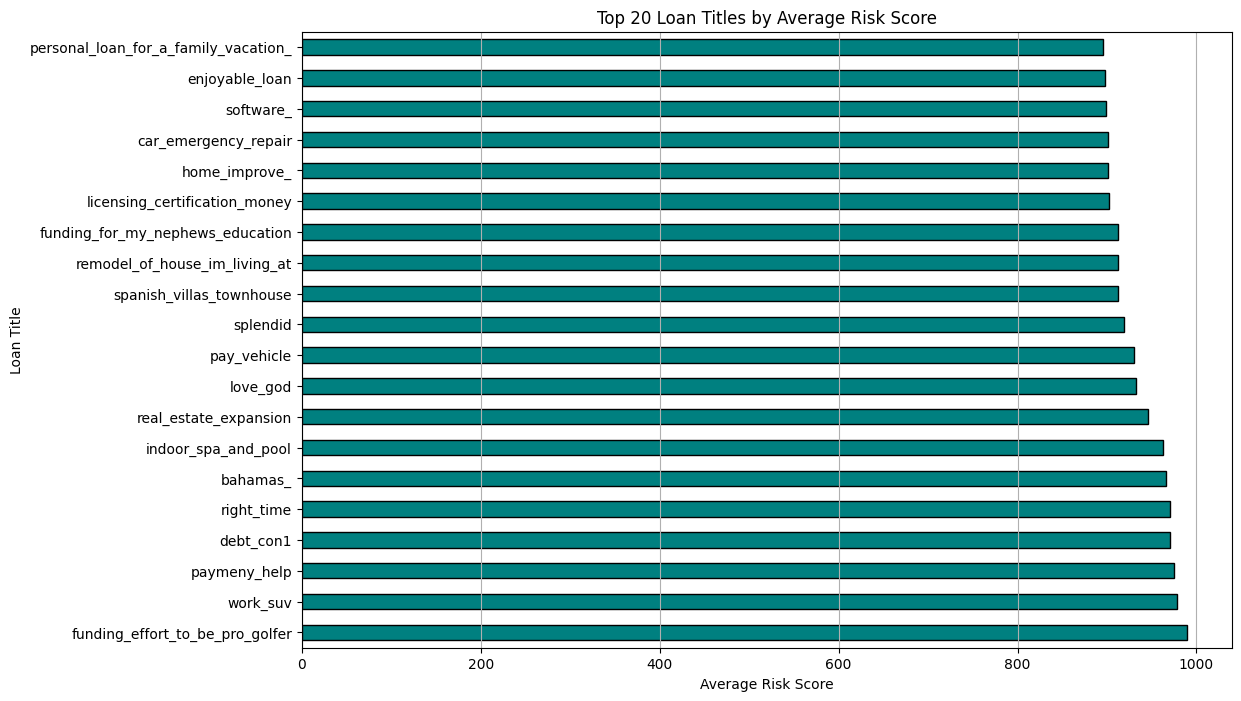

In [ ]:
# Plotting the relation between loan title and average risk score
plt.figure(figsize=(12, 8))
(sample_rejected.groupby('Loan_Title')['Risk_Score']
 .mean()
 .sort_values(ascending=False)
 .head(20)
 .plot(kind='barh', color='teal', edgecolor='black'))
plt.title('Top 20 Loan Titles by Average Risk Score')
plt.xlabel('Average Risk Score')
plt.ylabel('Loan Title')
plt.grid(axis='x')
plt.show()

# Statistical Inference

 I am interested in investigating if there is a significant difference in the mean 'Amount Requested' between two different states. ( CA & TX )

* Null Hypothesis (H0): The mean 'Amount Requested' is the same for both states.

* Alternative Hypothesis (H1): The mean 'Amount Requested' is different between the two states.

In [54]:
from scipy import stats
from scipy.stats import ttest_ind

# Select two states for comparison
state1_data = sample_rejected[sample_rejected['State'] == 'CA']['Amount_Requested']
state2_data = sample_rejected[sample_rejected['State'] == 'TX']['Amount_Requested']

# Perform the t-test
t_statistic, p_value = ttest_ind(state1_data.dropna(), state2_data.dropna(), equal_var=False)

# Print results
print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")

# Interpretation
if p_value < 0.05:  # Assuming a 5% significance level
    print("We reject the null hypothesis. There is a significant difference in the mean 'Amount Requested' between the two states.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the mean 'Amount Requested' between the two states.")


T-Statistic: 3.241125615775336, P-Value: 0.0011908973108916703
We reject the null hypothesis. There is a significant difference in the mean 'Amount Requested' between the two states.


**T-Statistic (3.241125615775336):**

The t-statistic is a measure of the difference between the two groups' means, relative to the spread or variability of their scores.

A high t-statistic (far from 0) suggests that the groups are different. In your case, a t-statistic of 3.24 is quite large, indicating a substantial difference between the mean 'Amount Requested' in the two states.

**P-Value (0.0011908973108916703):**

The p-value tells us about the probability of obtaining a test statistic at least as extreme as the one observed, under the assumption that the null hypothesis is true (in this case, the null hypothesis is that there is no difference in the mean 'Amount Requested' between the two states).

A p-value of 0.0011908973108916703 is extremely small (practically zero). This means that the probability of observing such a large difference between the groups, purely by chance, is virtually zero.

In statistical testing, a common threshold for significance is 0.05 (5%). Since your p-value is far below this threshold, it provides strong evidence against the null hypothesis.

**Conclusion:**

* Given the high t-statistic and the extremely low p-value, you have very strong evidence to reject the null hypothesis.

* This leads to the conclusion that there is a statistically significant difference in the mean 'Amount Requested' between the two states being compared.

* It's important to note that while this test tells us that the means are significantly different, it doesn't indicate the size of the difference or its practical significance – only that the difference is unlikely to be due to random chance.

This function is used to test whether there are any statistically significant differences between the means of two independent samples.

# Data Preprocessing

In [55]:
df.isnull().sum()

Amount_Requested            0
Risk_Score                  0
Debt_To_Income_Ratio        0
Employment_Length       19789
Loan_Title                  0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627636 entries, 4404458 to 19699073
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount_Requested      627636 non-null  int64  
 1   Risk_Score            627636 non-null  float16
 2   Debt_To_Income_Ratio  627636 non-null  float64
 3   Employment_Length     627636 non-null  float64
 4   Loan_Title            627636 non-null  object 
dtypes: float16(1), float64(2), int64(1), object(1)
memory usage: 25.1+ MB


In [58]:
df_float_columns = []
df_category_columns = []

for i in df.columns:
  if df[i].dtype in ['int64','float64','float16']:
    df_float_columns.append(i)
  if df[i].dtype in ['object','category']:
    df_category_columns.append(i)

print(f'float columns: {df_float_columns}')
print('__'*70)
print(f'category columns: {df_category_columns}')

float columns: ['Amount_Requested', 'Risk_Score', 'Debt_To_Income_Ratio', 'Employment_Length']
____________________________________________________________________________________________________________________________________________
category columns: ['Loan_Title']


In [59]:
# scalethe numerical columns and categorical columns

from sklearn.preprocessing import StandardScaler, LabelEncoder
# Scale the numerical columns
scaler = StandardScaler()
scaled_numerical_columns = scaler.fit_transform(df[df_float_columns])
# Scale the categorical columns
encoder = LabelEncoder()
scaled_categorical_columns = df[df_category_columns].apply(encoder.fit_transform)
# Continue scaling the categorical columns
scaled_categorical_columns = scaler.fit_transform(scaled_categorical_columns)


In [60]:
df = pd.concat([pd.DataFrame(scaled_numerical_columns, columns=df_float_columns),
                pd.DataFrame(scaled_categorical_columns, columns=df_category_columns)], axis=1)
df.head()

,Amount_Requested,Risk_Score,Debt_To_Income_Ratio,Employment_Length,Loan_Title
0,-0.975357,-0.212647,-0.053114,-0.210818,1.438687
1,-0.599256,-0.357511,-0.053073,-0.210818,1.438687
2,-0.129130,-0.566759,-0.053910,-0.210818,-0.117749
3,1.280496,0.028793,-0.047154,-0.210818,1.438687
4,2.222252,-0.260935,-0.053910,-0.210818,1.438687


Lets check the outliers by Local Outlier Factor (LOF) method

In [61]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the LOF detector
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Fit the model and predict outliers
# lof.fit_predict returns 1 for normal, -1 for outliers
outliers = lof.fit_predict(df)

# Add the outliers to your dataframe
df['outlier'] = outliers

# Filter the outliers
outlier_data = df[df['outlier'] == -1]

# Number of outliers detected
num_outliers = outlier_data.shape[0]

print(f"Number of outliers detected: {num_outliers}")

Number of outliers detected: 74260


In [62]:
df.head()

,Amount_Requested,Risk_Score,Debt_To_Income_Ratio,Employment_Length,Loan_Title,outlier
0,-0.975357,-0.212647,-0.053114,-0.210818,1.438687,1
1,-0.599256,-0.357511,-0.053073,-0.210818,1.438687,1
2,-0.129130,-0.566759,-0.053910,-0.210818,-0.117749,1
3,1.280496,0.028793,-0.047154,-0.210818,1.438687,1
4,2.222252,-0.260935,-0.053910,-0.210818,1.438687,1


In [63]:
df['outlier'].value_counts()

 1    553376
-1     74260
Name: outlier, dtype: int64

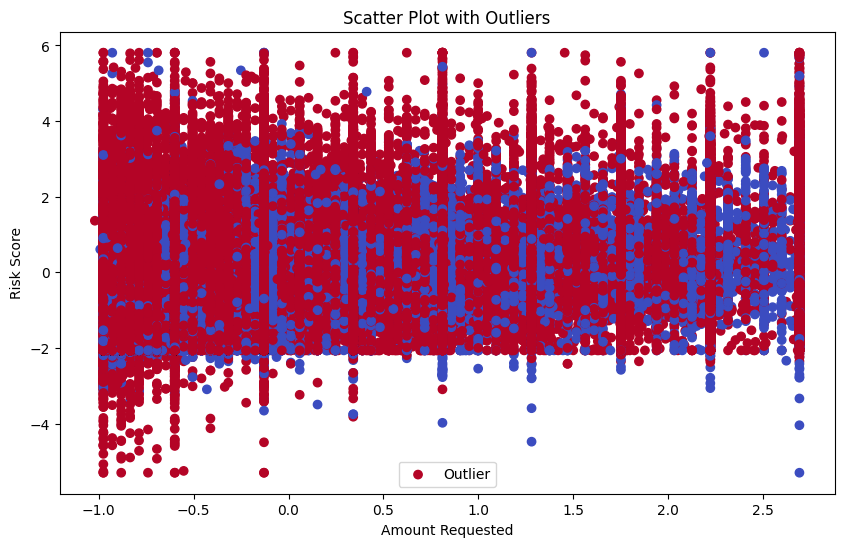

In [64]:
# Scatter plot of two numerical features
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount_Requested'], df['Risk_Score'], c=df['outlier'], cmap='coolwarm', label='Outlier')
plt.xlabel('Amount Requested')
plt.ylabel('Risk Score')
plt.title('Scatter Plot with Outliers')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_numerical_columns)

# Add the cluster labels to your dataframe
df['cluster'] = clusters

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount_Requested'], df['Risk_Score'], c=df['cluster'], cmap='viridis', label='Cluster')
plt.xlabel('Amount Requested')
plt.ylabel('Risk Score')
plt.title('Scatter Plot with Clusters')
plt.legend()
plt.show()